In [2]:
!pip uninstall pyarrow -y
!pip cache purge
!pip install pyarrow --no-cache-dir

Found existing installation: pyarrow 21.0.0
Uninstalling pyarrow-21.0.0:
  Successfully uninstalled pyarrow-21.0.0
Files removed: 2492 (1960.3 MB)
   ---------------------------------------- 0.0/28.0 MB ? eta -:--:--
   - -------------------------------------- 0.8/28.0 MB 6.7 MB/s eta 0:00:05
   -- ------------------------------------- 1.8/28.0 MB 4.6 MB/s eta 0:00:06
   --- ------------------------------------ 2.6/28.0 MB 4.3 MB/s eta 0:00:06
   ---- ----------------------------------- 3.4/28.0 MB 3.8 MB/s eta 0:00:07
   ----- ---------------------------------- 4.2/28.0 MB 4.1 MB/s eta 0:00:06
   ------- -------------------------------- 5.0/28.0 MB 3.9 MB/s eta 0:00:06
   -------- ------------------------------- 5.8/28.0 MB 3.8 MB/s eta 0:00:06
   --------- ------------------------------ 6.6/28.0 MB 3.8 MB/s eta 0:00:06
   ---------- ----------------------------- 7.3/28.0 MB 3.8 MB/s eta 0:00:06
   ----------- ---------------------------- 7.9/28.0 MB 3.7 MB/s eta 0:00:06
   ----------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Use fastparquet instead of pyarrow (more reliable on Windows)
!pip uninstall pyarrow -y
!pip install fastparquet

Found existing installation: pyarrow 22.0.0
Uninstalling pyarrow-22.0.0:
  Successfully uninstalled pyarrow-22.0.0



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



=== EDA for AAPL ===


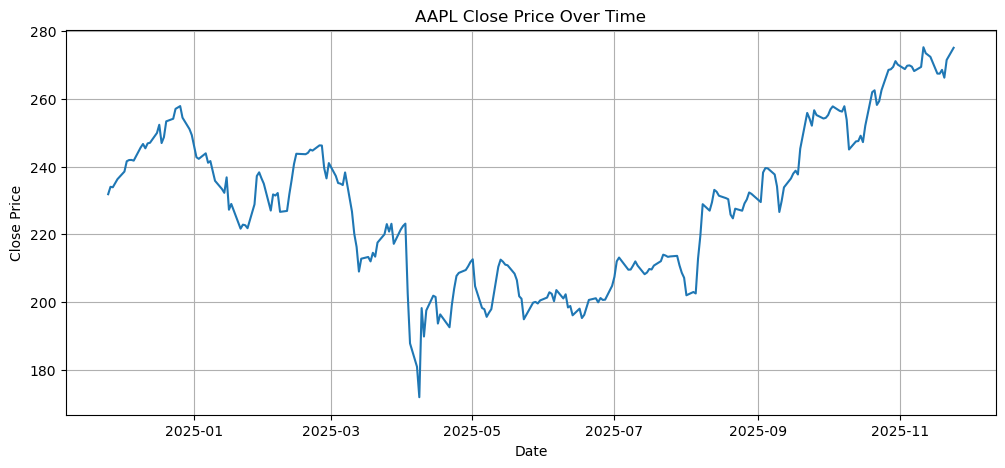

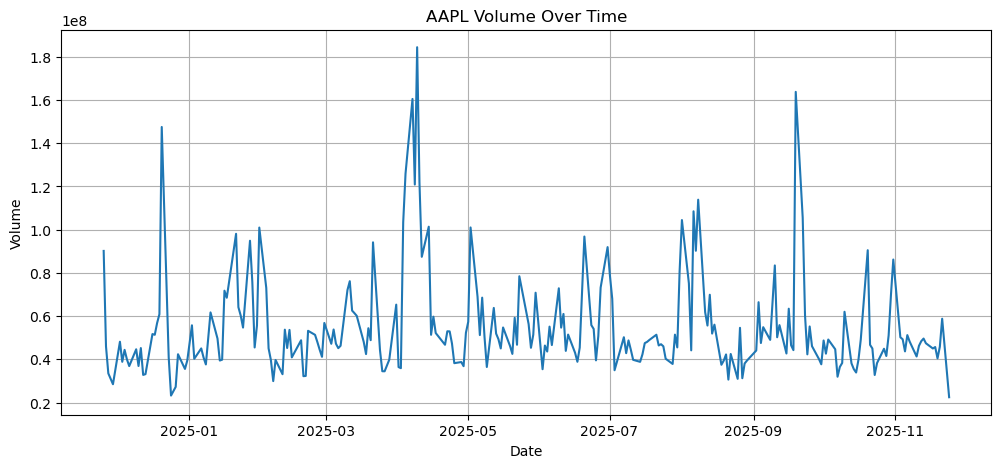

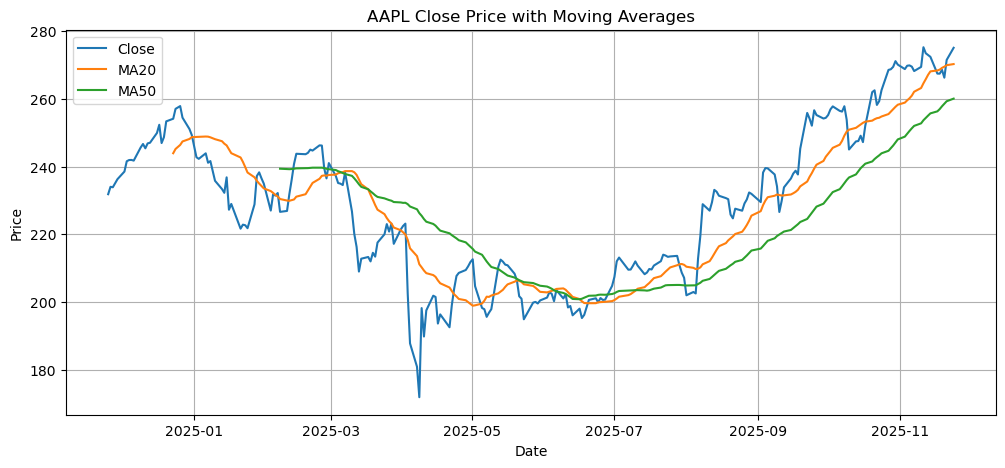


=== EDA for MSFT ===


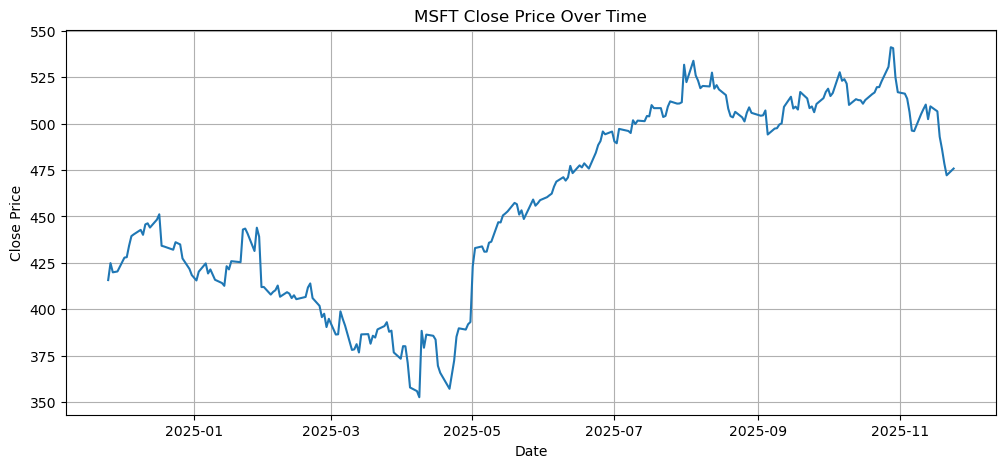

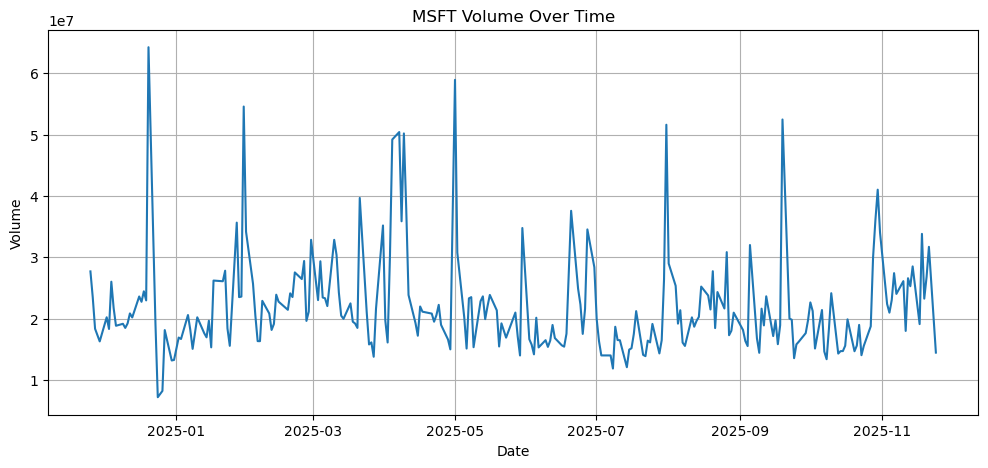

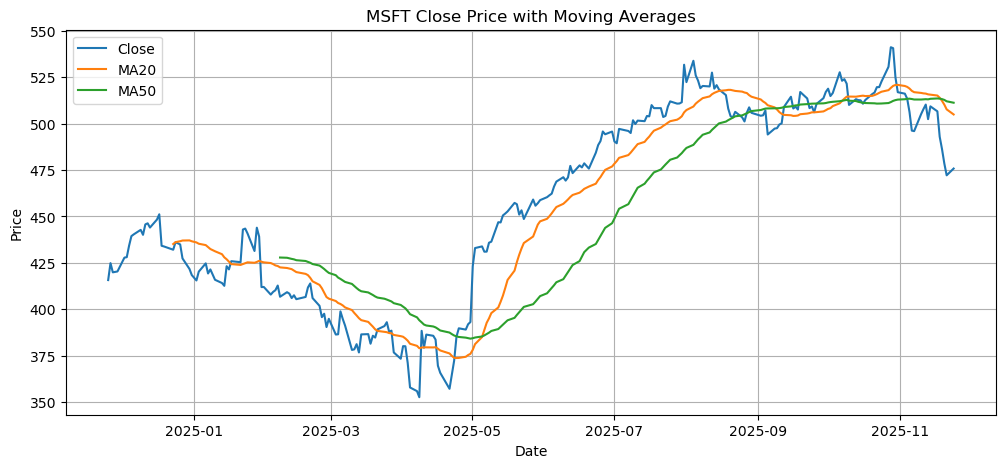


=== EDA for AMZN ===


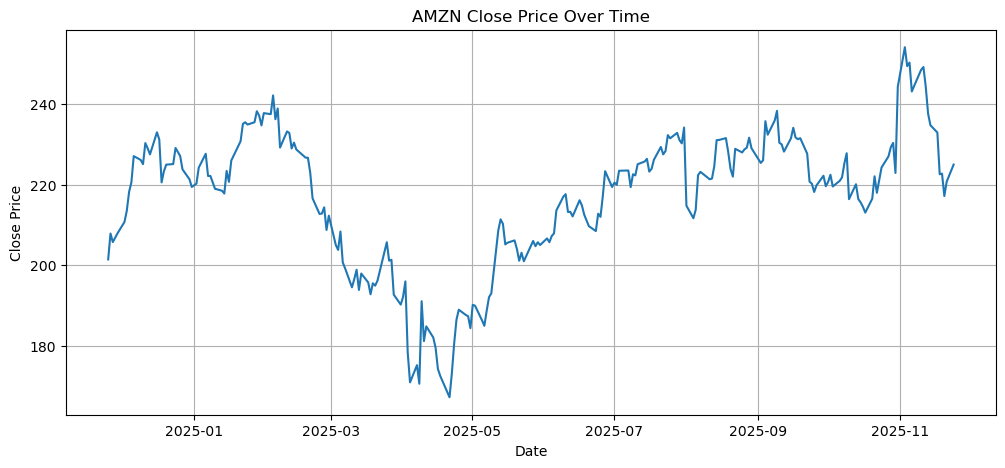

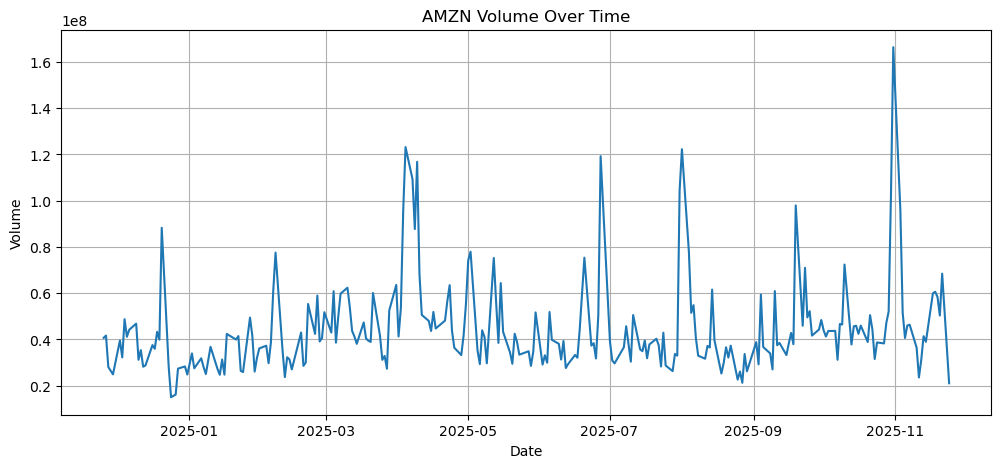

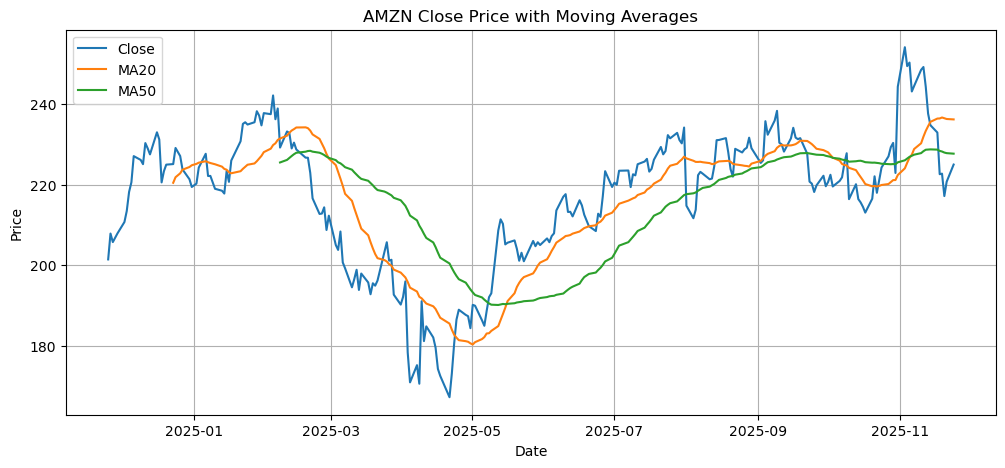


=== EDA for TSLA ===


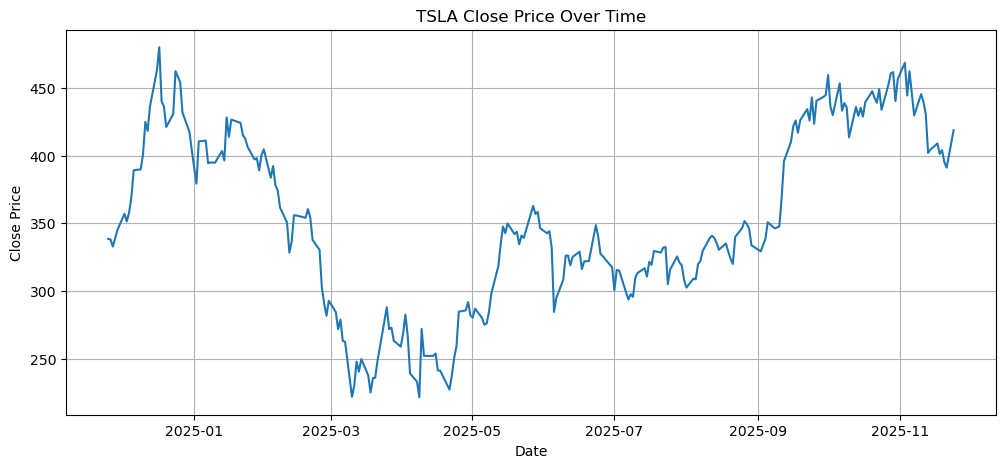

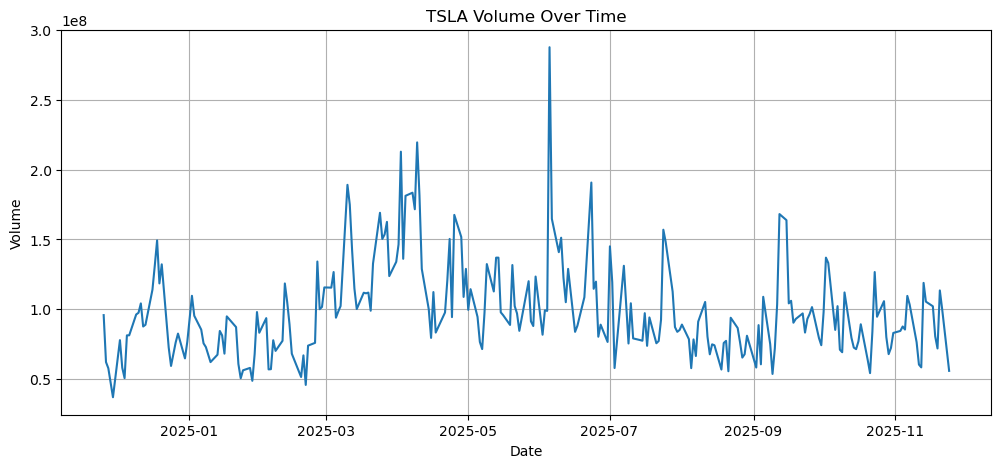

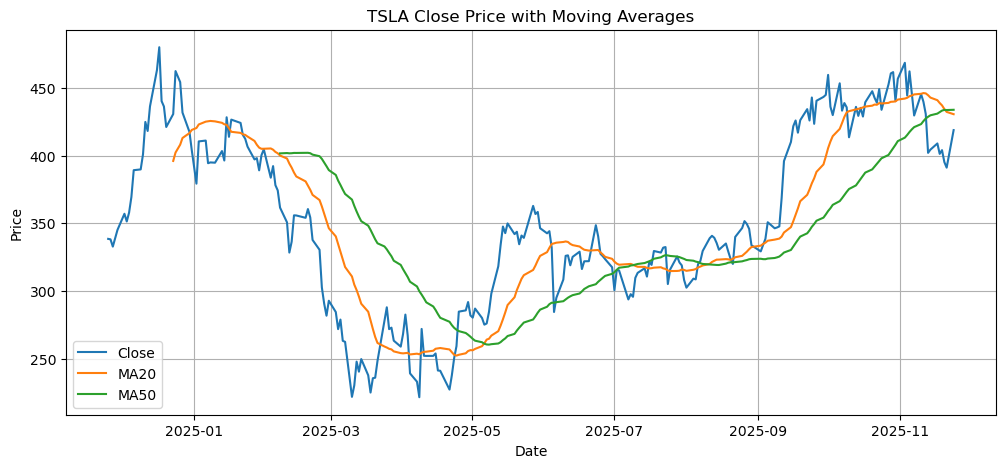


=== EDA for JPM ===


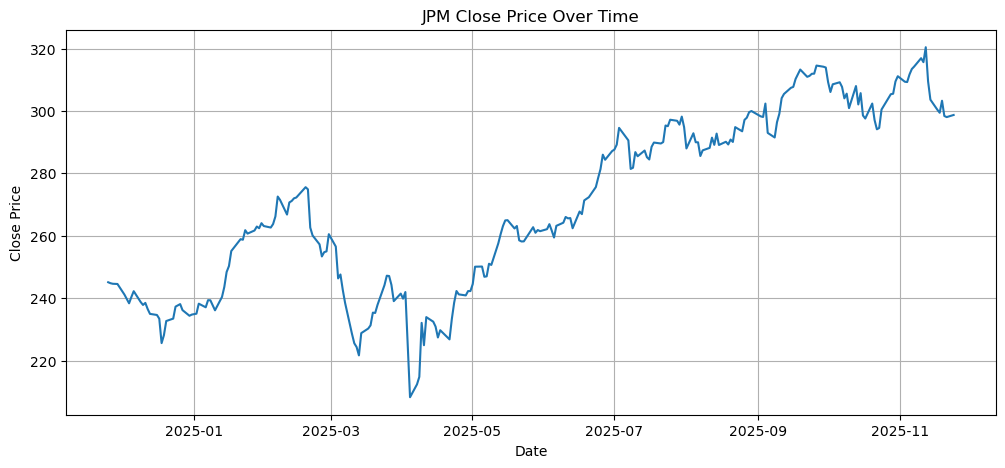

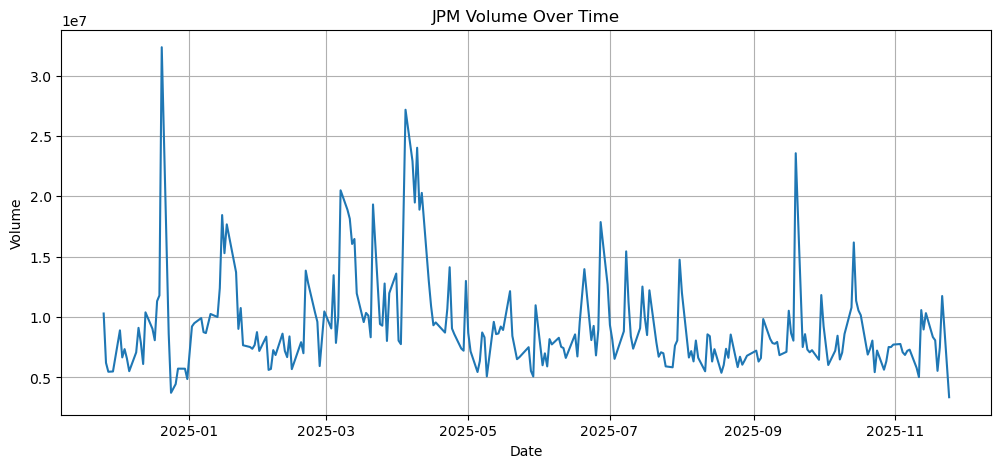

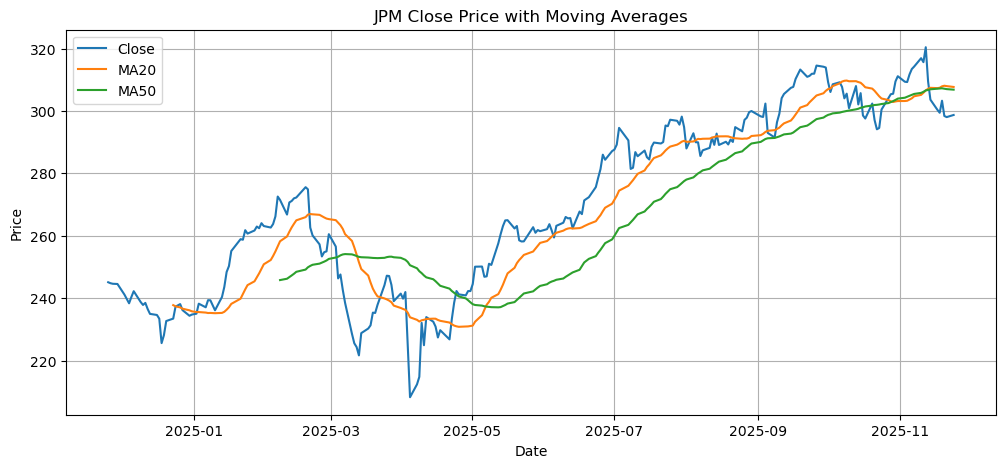

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

processed_dir = "../data/processed"

tickers = ["AAPL", "MSFT", "AMZN", "TSLA", "JPM"]

for ticker in tickers:
    print(f"\n=== EDA for {ticker} ===")
    path = os.path.join(processed_dir, f"{ticker}_clean.parquet")
    df = pd.read_parquet(path)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    df.sort_index(inplace=True)
    plt.figure(figsize=(12,5))
    plt.plot(df.index, df["Close"])
    plt.title(f"{ticker} Close Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12,5))
    plt.plot(df.index, df["Volume"])
    plt.title(f"{ticker} Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.grid(True)
    plt.show()

    # Moving Averages
    df["MA20"] = df["Close"].rolling(20).mean()
    df["MA50"] = df["Close"].rolling(50).mean()

    plt.figure(figsize=(12,5))
    plt.plot(df.index, df["Close"], label="Close")
    plt.plot(df.index, df["MA20"], label="MA20")
    plt.plot(df.index, df["MA50"], label="MA50")
    plt.title(f"{ticker} Close Price with Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd

df_ml = pd.read_parquet("../data/processed/TSLA_ml.parquet")

# Ensure sorted by Date (safety)
df_ml = df_ml.sort_index()

# Time-based split
split = int(len(df_ml) * 0.8)

train_df = df_ml.iloc[:split]
test_df = df_ml.iloc[split:]

train_df.shape, test_df.shape
